In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.pyplot as plt
from utils import u_arrays as ua, constants
import xarray as xr
from scipy import ndimage
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = (16., 9.)
from scipy.stats import gaussian_kde
%matplotlib inline


In [3]:
path = constants.CLOVER_HIST
rain_path = constants.CP4_RAIN
olr_path = constants.CP4_OLR

AttributeError: module 'utils.constants' has no attribute 'CLOVER_HIST'

In [ ]:
p_arr = xr.open_dataset(rain_path)
olr_arr = xr.open_dataset(olr_path)

In [ ]:
p_ar = p_arr['lsRain'].sel(longitude=slice(-13,13), latitude=slice(4,8))
olr_ar = olr_arr['lw_out_PBLtop'].sel(longitude=slice(-13, 13), latitude=slice(4, 8))

In [ ]:
p_ar.values = p_ar.values * 3600

In [84]:
inds = np.where(p_ar.values>30)

In [85]:
olr_dat=olr_ar.values[inds]
p_dat=p_ar.values[inds]

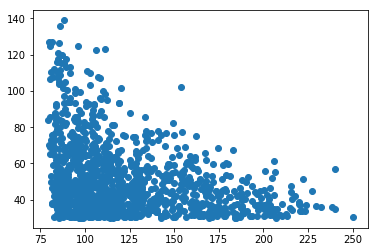

In [86]:
plt.scatter(olr_dat, p_dat)

In [51]:
np.percentile(p_ar.values[p_ar.values>0.1], 99)

55.652732429504383

In [52]:
p = p_dat[p_dat>=0.1]
t = olr_dat[p_dat>=0.1]

In [44]:
p.min()

1.0000681

In [41]:

bins=np.arange(50, 191, 10)   # compute probability per temperature range (1degC)
ppo30=np.where(p > 30)  
to30=t[ppo30]   

H1, bins1 = np.histogram(to30, bins=bins, range=(t.min(), t.max()))
H, bins = np.histogram(t, bins=bins, range=(t.min(), t.max()))
H=H.astype(float)
H1=H1.astype(float)
histo=H1/H*100.
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2

print('Bins included, [bin[', bins[0:11])
print('Fraction of <-80s to be >30', np.sum(H1[0:11])/np.sum(H[0:11]))

print('Bins included, [bin[', bins[-31::])
print('Fraction of >-40s to be >30', np.sum(H1[-31::])/np.sum(H[-31::]))

# In[7]:

H, xedges, yedges = np.histogram2d(t, p, bins=(25, 25))
hh = (H / np.sum(H))*100.
np.sum(hh)

# In[9]:


rt = t
rp = p

# print('Percentile',np.percentile(p[p>=0], 95))
# print(np.sum((rp>=30) & (rt<-60))/np.sum(rp>=30))


# In[11]:


Bins included, [bin[ [ 50  60  70  80  90 100 110 120 130 140 150]
Fraction of <-80s to be >30 0.0403431122949
Bins included, [bin[ [ 50  60  70  80  90 100 110 120 130 140 150 160 170 180 190]
Fraction of >-40s to be >30 0.0402534995473


/users/global/cornkle/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


In [37]:
histo

array([          nan,           nan,  100.        ,   13.56821589,
          4.98380264,    3.68996848,    3.39746214,    2.71655561,
          2.86916603,    2.75754422,    3.21038251,    4.11290323,
          4.30950049,    3.34773218])

KeyboardInterrupt: 

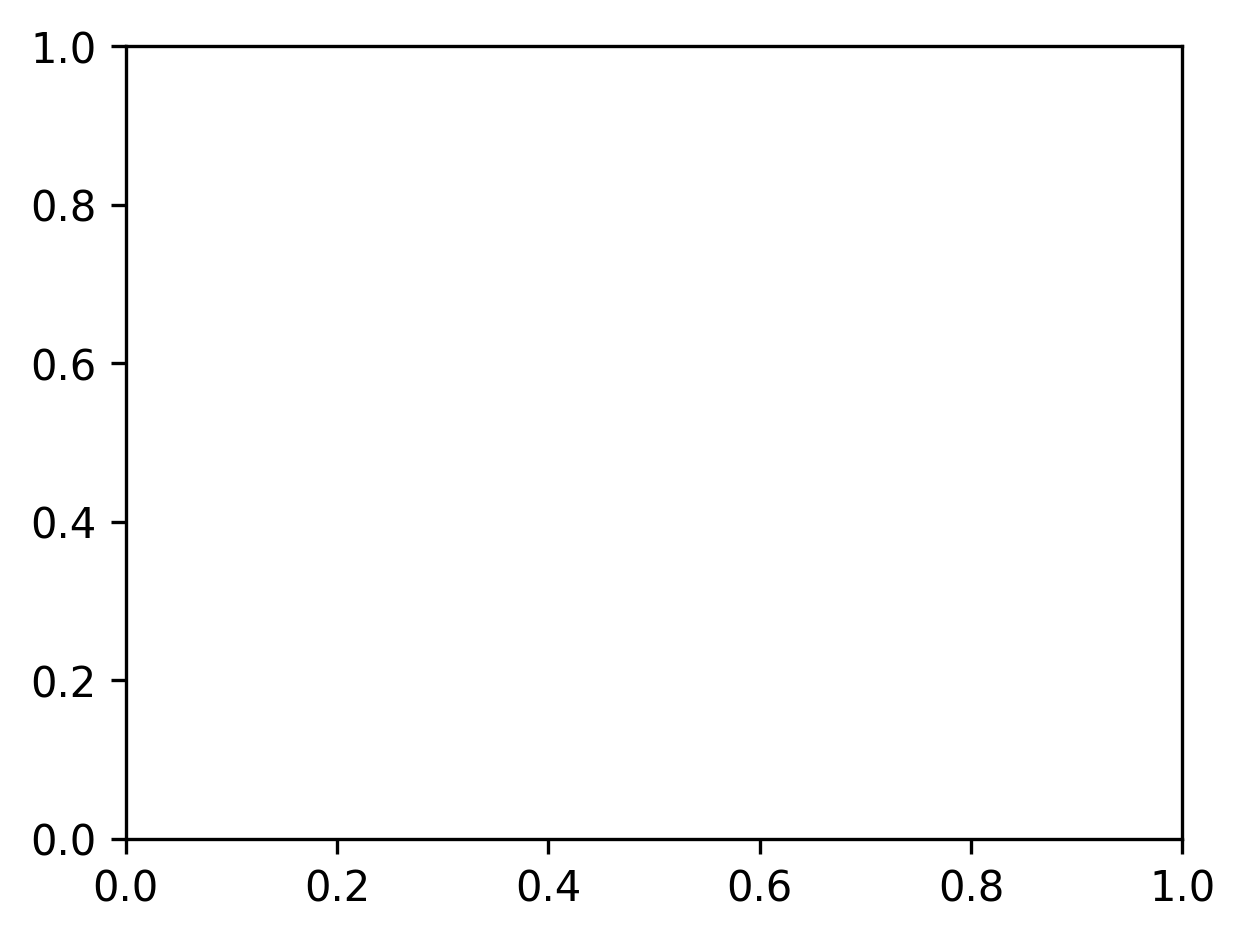

In [19]:

path = '/users/global/cornkle/figs/CLOVER/TRMM_MSG/'
fig = plt.figure(figsize=(10, 3.5))
cc=0.8
ax1 = fig.add_subplot(121)
xy = np.vstack([p,t])
z = gaussian_kde(xy)(xy)
test = z / (z.max() - z.min())
mappable = ax1.scatter(rt, rp, c=test, edgecolor='', cmap='viridis_r', s=20) # viridis_r
#ax1.set_title('~13400 contiguous cold clouds (< -10$^{\degree}C$, > 325 km$^2$ )')
ax1.set_ylabel('Max. precipitation (mm h$^{-1}$)')
ax1.set_xlabel('Min. temperature ($^{\degree}C$)')
ax1.hlines(31, -95, -10, linestyles='dashed', label='99$^{th}$ percentile', linewidth=1.5, color='black')
plt.text(-35, 18, '30 mm h$^{-1}$',  fontsize=12)

cbar = fig.colorbar(mappable)
cbar.set_label('Area (10$^3$ km$^2$)')
#plt.text(0.03, 0.9, 'a', transform=ax1.transAxes, fontsize=20)
######################

ax1 = fig.add_subplot(122)
ax1.scatter(center, histo, marker="o",color='#5ea1d4', s=30, zorder=2, edgecolor = 'black', linewidth=1)
ax1.set_xlabel('Min. temperature (1 $^{\degree}C$ bins)')
ax1.set_ylabel('Probability (% | Extreme rain)')
#plt.text(0.03, 0.9, 'b', transform=ax1.transAxes, fontsize=20)

fsiz = 14
x = 0.02
plt.annotate('a)', xy=(0.02, 0.935), xytext=(0, 4), size=fsiz, xycoords=('figure fraction', 'figure fraction'),
                 textcoords='offset points')
plt.annotate('b)', xy=(0.51, 0.935), xytext=(0, 4), size=fsiz, xycoords=('figure fraction', 'figure fraction'),
                 textcoords='offset points')


plt.show()


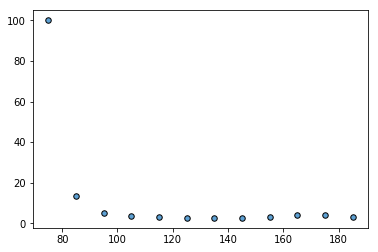

In [45]:
plt.figure()
plt.scatter(center, histo, marker="o",color='#5ea1d4', s=30, edgecolor = 'black', linewidth=1)
plt.show()

In [22]:
histo

array([             nan,              nan,   1.00000000e+02,
         4.78134111e+00,   1.09204368e+00,   5.03105102e-01,
         2.86327845e-01,   1.12196410e-01,   1.24283643e-01,
         8.03804675e-02,   7.44832723e-02,   4.02692286e-02,
         2.04415372e-02,   8.85034074e-03])

In [23]:
center

array([  55.,   65.,   75.,   85.,   95.,  105.,  115.,  125.,  135.,
        145.,  155.,  165.,  175.,  185.])